In [6]:
from models.hqa_gan import HQA
from Datasets.ImageNetDataset import ImageNet100

from torch.utils.data import DataLoader
from torchvision import transforms

ROOT_FOLDER = '/home/dl_class/data/ILSVRC/Data/CLS-LOC/'

imageNet100 = ImageNet100(ROOT_FOLDER, split='val', transform=transforms.Compose([
                                                            transforms.CenterCrop(224),
                                                            transforms.ToTensor()]))
dataloader = DataLoader(imageNet100, batch_size=64, shuffle=True)
iter_dataloader = iter(dataloader)
model = HQA(prev_model=None, input_feat_dim=3)


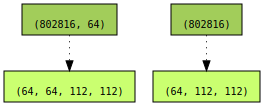

In [8]:
from torchviz import make_dot

x,_ = next(iter_dataloader)
z_e = model.encode(x)

make_dot(model.codebook.quantize(z_e, soft=True), params=dict(model.named_parameters()))